In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_excel('modeltrain.xlsx')
test=pd.read_excel('modeltest.xlsx')

In [3]:
test['house_mortage+owner_costs'].isnull().sum()

268

In [4]:
test=test.dropna(subset=['house_mortage+owner_costs'])

In [5]:
test['house_mortage+owner_costs'].isnull().sum()

0

In [6]:
train['primary'].unique()

array(['tract'], dtype=object)

In [7]:
train=train.drop(['primary'],axis=1)

In [8]:
test=test.drop(['primary'],axis=1)

In [9]:
train['city'].value_counts()

Chicago           289
Brooklyn          264
Los Angeles       230
Houston           214
Philadelphia      163
                 ... 
Maple               1
Holton              1
Sheffield Lake      1
West Deptford       1
Colleyville         1
Name: city, Length: 6886, dtype: int64

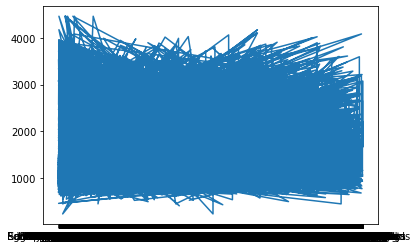

In [10]:
plt.plot(train['city'],train['house_mortage+owner_costs'])

In [11]:
#dropping city and place
train=train.drop(['city','place'],axis=1)
test=test.drop(['city','place'],axis=1)

In [12]:
#dropping dupe variables to avoid multicollinearity
train=train.drop(['male_pop','female_pop','debt','male_age','female_age','median_age','family_income'],axis=1)
test=test.drop(['male_pop','female_pop','debt','male_age','female_age','median_age','family_income'],axis=1)

In [13]:
train=train.drop(['hs_degree_male','hs_degree_female'],axis=1)
test=test.drop(['hs_degree_male','hs_degree_female'],axis=1)

In [14]:
train

state     type    pop  home_equity_second_mortgage  \
0          New York     City   5230                 1.588000e+22   
1           Indiana     City   2633                 2.222000e+22   
2           Indiana     City   6881                 0.000000e+00   
3       Puerto Rico    Urban   2700                 1.086000e+22   
4            Kansas     City   5637                 5.426000e+22   
...             ...      ...    ...                          ...   
26743   Puerto Rico    Urban   1847                 0.000000e+00   
26744  Pennsylvania  Borough   4155                 8.450000e+21   
26745      Colorado     City   2829                 2.024000e+22   
26746         Texas     Town  11542                 5.801000e+22   
26747        Nevada     City   3726                 1.412000e+22   

       second_mortgage   home_equity     hs_degree       pct_own  \
0         2.077000e+22  8.919000e+22  8.928800e+23  7.904600e+23   
1         2.222000e+22  4.274000e+22  9.048700e+23  5.248300e+23   
2         0.000000e+00  9.512000e+22  9.428800e+23  8.533100e+23   
3         1.086000e+22  1.086000e+22  9.150000e+23  6.503700e+23   
4         5.426000e+22  5.426000e+22  1.000000e+24  1.304600e+23   
...                ...           ...           ...           ...   
26743     0.000000e+00  0.000000e+00  6.015500e+23  6.042200e+23   
26744     2.112000e+22  1.964100e+23  9.573700e+23  6.807200e+23   
26745     2.024000e+22  7.857000e+22  9.355500e+23  7.850800e+23   
26746     7.550000e+22  1.255600e+23  9.854000e+23  9.397000e+23   
26747     1.412000e+22  1.836200e+23  8.737000e+23  2.791200e+23   

            married   married_snp     separated      divorced    rent  \
0      5.785100e+23  1.882000e+22  1.240000e+22  8.770000e+22   784.0   
1      3.488600e+23  1.426000e+22  1.426000e+22  9.030000e+22   848.0   
2      6.474500e+23  2.830000e+22  1.607000e+22  1.065700e+23   703.0   
3      4.725700e+23  2.021000e+22  2.021000e+22  1.010600e+23   782.0   
4      1.235600e+23  0.000000e+00  0.000000e+00  3.109000e+22   881.0   
...             ...           ...           ...           ...     ...   
26743  2.460300e+23  3.042000e+22  2.249000e+22  1.468300e+23   419.0   
26744  6.112700e+23  5.003000e+22  2.473000e+22  4.888000e+22  1788.0   
26745  7.045100e+23  1.386000e+22  5.200000e+21  7.712000e+22   834.0   
26746  7.550300e+23  2.287000e+22  9.150000e+21  5.261000e+22  1843.0   
26747  3.442600e+23  3.825000e+22  3.005000e+22  1.332000e+23   924.0   

       household_income      bad_debt  population_density     good_debt  \
0                 48120  9.408000e+22            0.000026  4.355500e+23   
1                 35186  4.274000e+22            0.001687  5.658100e+23   
2                 74964  9.512000e+22            0.000099  6.397200e+23   
3                 37845  1.086000e+22            0.002442  5.162800e+23   
4                 22497  5.426000e+22            0.002207  4.651200e+23   
...                 ...           ...                 ...           ...   
26743             13317  0.000000e+00            0.002650  1.169400e+23   
26744            108284  2.090800e+23            0.000818  4.445600e+23   
26745             73350  7.857000e+22            0.000002  5.023800e+23   
26746            148548  1.430500e+23            0.000619  5.141700e+23   
26747             38072  1.836200e+23            0.000478  4.717500e+23   

       house_owner_costs  house_mortage+owner_costs  
0              570.01530                 1414.80295  
1              351.98293                  864.41390  
2              556.45986                 1506.06758  
3              288.04047                 1175.28642  
4              443.68855                 1192.58759  
...                  ...                        ...  
26743          160.86544                  770.11560  
26744          712.16631                 2210.84055  
26745          536.04921                 1671.07908  
26746         1076.86881                 3074.83088  
26747   

<AxesSubplot:>

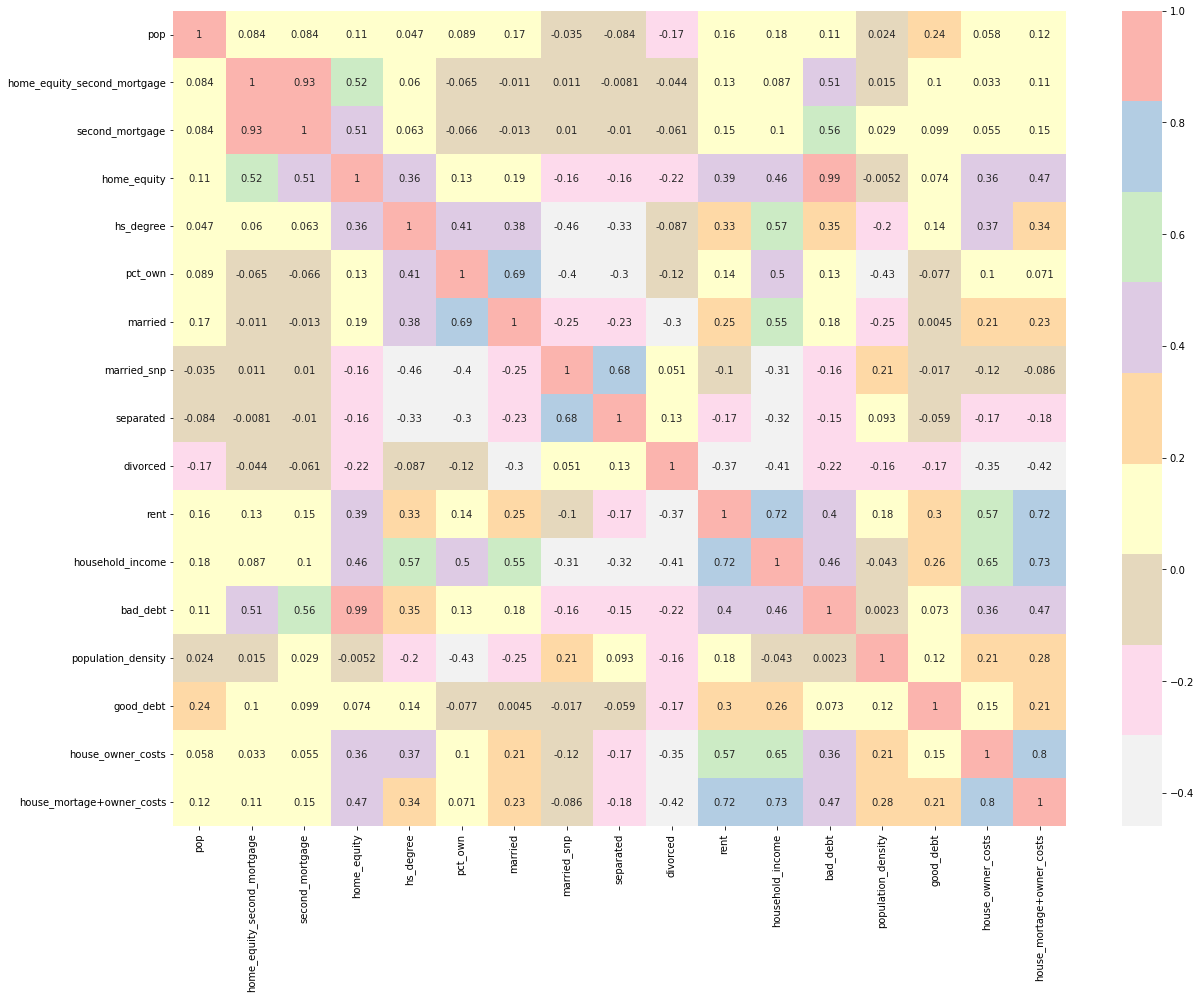

In [15]:
f, ax = plt.subplots(figsize =(20,15))
sns.heatmap(train.corr(),annot=True,cmap='Pastel1_r')

In [16]:
df=['type','pop','home_equity_second_mortgage','second_mortgage','home_equity','hs_degree','pct_own','married','married_snp','separated','divorced','rent','household_income','bad_debt','population_density','good_debt','house_owner_costs','house_mortage+owner_costs']
df1=train[df]
df2=test[df]

In [17]:
df1

type    pop  home_equity_second_mortgage  second_mortgage  \
0         City   5230                 1.588000e+22     2.077000e+22   
1         City   2633                 2.222000e+22     2.222000e+22   
2         City   6881                 0.000000e+00     0.000000e+00   
3        Urban   2700                 1.086000e+22     1.086000e+22   
4         City   5637                 5.426000e+22     5.426000e+22   
...        ...    ...                          ...              ...   
26743    Urban   1847                 0.000000e+00     0.000000e+00   
26744  Borough   4155                 8.450000e+21     2.112000e+22   
26745     City   2829                 2.024000e+22     2.024000e+22   
26746     Town  11542                 5.801000e+22     7.550000e+22   
26747     City   3726                 1.412000e+22     1.412000e+22   

        home_equity     hs_degree       pct_own       married   married_snp  \
0      8.919000e+22  8.928800e+23  7.904600e+23  5.785100e+23  1.882000e+22   
1      4.274000e+22  9.048700e+23  5.248300e+23  3.488600e+23  1.426000e+22   
2      9.512000e+22  9.428800e+23  8.533100e+23  6.474500e+23  2.830000e+22   
3      1.086000e+22  9.150000e+23  6.503700e+23  4.725700e+23  2.021000e+22   
4      5.426000e+22  1.000000e+24  1.304600e+23  1.235600e+23  0.000000e+00   
...             ...           ...           ...           ...           ...   
26743  0.000000e+00  6.015500e+23  6.042200e+23  2.460300e+23  3.042000e+22   
26744  1.964100e+23  9.573700e+23  6.807200e+23  6.112700e+23  5.003000e+22   
26745  7.857000e+22  9.355500e+23  7.850800e+23  7.045100e+23  1.386000e+22   
26746  1.255600e+23  9.854000e+23  9.397000e+23  7.550300e+23  2.287000e+22   
26747  1.836200e+23  8.737000e+23  2.791200e+23  3.442600e+23  3.825000e+22   

          separated      divorced    rent  household_income      bad_debt  \
0      1.240000e+22  8.770000e+22   784.0             48120  9.408000e+22   
1      1.426000e+22  9.030000e+22   848.0             35186  4.274000e+22   
2      1.607000e+22  1.065700e+23   703.0             74964  9.512000e+22   
3      2.021000e+22  1.010600e+23   782.0             37845  1.086000e+22   
4      0.000000e+00  3.109000e+22   881.0             22497  5.426000e+22   
...             ...           ...     ...               ...           ...   
26743  2.249000e+22  1.468300e+23   419.0             13317  0.000000e+00   
26744  2.473000e+22  4.888000e+22  1788.0            108284  2.090800e+23   
26745  5.200000e+21  7.712000e+22   834.0             73350  7.857000e+22   
26746  9.150000e+21  5.261000e+22  1843.0            148548  1.430500e+23   
26747  3.005000e+22  1.332000e+23   924.0             38072  1.836200e+23   

       population_density     good_debt  house_owner_costs  \
0                0.000026  4.355500e+23          570.01530   
1                0.001687  5.658100e+23          351.98293   
2                0.000099  6.397200e+23          556.45986   
3                0.002442  5.162800e+23          288.04047   
4                0.002207  4.651200e+23          443.68855   
...                   ...           ...                ...   
26743            0.002650  1.169400e+23          160.86544   
26744            0.000818  4.445600e+23          712.16631   
26745            0.000002  5.023800e+23          536.04921   
26746            0.000619  5.141700e+23         1076.86881   
26747            0.000478  4.717500e+23          540.26838   

       house_mortage+owner_costs  
0                     1414.80295  
1                      864.41390  
2                     1506.06758  
3                     1175.28642  
4                     1192.58759  
...                          ...  
26743                  770.11560  
26744                 2210.84055  
26745                 1671.07908  
26746                 3074.83088  
26747                 1455.42340  

[26748 rows x 18 columns]

In [18]:
train_df=pd.get_dummies(df1)

In [19]:
train_df

pop  home_equity_second_mortgage  second_mortgage   home_equity  \
0       5230                 1.588000e+22     2.077000e+22  8.919000e+22   
1       2633                 2.222000e+22     2.222000e+22  4.274000e+22   
2       6881                 0.000000e+00     0.000000e+00  9.512000e+22   
3       2700                 1.086000e+22     1.086000e+22  1.086000e+22   
4       5637                 5.426000e+22     5.426000e+22  5.426000e+22   
...      ...                          ...              ...           ...   
26743   1847                 0.000000e+00     0.000000e+00  0.000000e+00   
26744   4155                 8.450000e+21     2.112000e+22  1.964100e+23   
26745   2829                 2.024000e+22     2.024000e+22  7.857000e+22   
26746  11542                 5.801000e+22     7.550000e+22  1.255600e+23   
26747   3726                 1.412000e+22     1.412000e+22  1.836200e+23   

          hs_degree       pct_own       married   married_snp     separated  \
0      8.928800e+23  7.904600e+23  5.785100e+23  1.882000e+22  1.240000e+22   
1      9.048700e+23  5.248300e+23  3.488600e+23  1.426000e+22  1.426000e+22   
2      9.428800e+23  8.533100e+23  6.474500e+23  2.830000e+22  1.607000e+22   
3      9.150000e+23  6.503700e+23  4.725700e+23  2.021000e+22  2.021000e+22   
4      1.000000e+24  1.304600e+23  1.235600e+23  0.000000e+00  0.000000e+00   
...             ...           ...           ...           ...           ...   
26743  6.015500e+23  6.042200e+23  2.460300e+23  3.042000e+22  2.249000e+22   
26744  9.573700e+23  6.807200e+23  6.112700e+23  5.003000e+22  2.473000e+22   
26745  9.355500e+23  7.850800e+23  7.045100e+23  1.386000e+22  5.200000e+21   
26746  9.854000e+23  9.397000e+23  7.550300e+23  2.287000e+22  9.150000e+21   
26747  8.737000e+23  2.791200e+23  3.442600e+23  3.825000e+22  3.005000e+22   

           divorced  ...  population_density     good_debt  house_owner_costs  \
0      8.770000e+22  ...            0.000026  4.355500e+23          570.01530   
1      9.030000e+22  ...            0.001687  5.658100e+23          351.98293   
2      1.065700e+23  ...            0.000099  6.397200e+23          556.45986   
3      1.010600e+23  ...            0.002442  5.162800e+23          288.04047   
4      3.109000e+22  ...            0.002207  4.651200e+23          443.68855   
...             ...  ...                 ...           ...                ...   
26743  1.468300e+23  ...            0.002650  1.169400e+23          160.86544   
26744  4.888000e+22  ...            0.000818  4.445600e+23          712.16631   
26745  7.712000e+22  ...            0.000002  5.023800e+23          536.04921   
26746  5.261000e+22  ...            0.000619  5.141700e+23         1076.86881   
26747  1.332000e+23  ...            0.000478  4.717500e+23          540.26838   

       house_mortage+owner_costs  type_Borough  type_CDP  type_City  \
0                     1414.80295             0         0          1   
1                      864.41390             0         0          1   
2                     1506.06758             0         0          1   
3                     1175.28642             0         0          0   
4                     1192.58759             0         0          1   
...                          ...           ...       ...        ...   
26743                  770.11560             0         0          0   
26744                 2210.84055             1         0          0   
26745                 1671.07908             0         0          1   
26746                 3074.83088             0         0          0   
26747                 1455.42340             0         0          1   

       type_Town  type_Urban  type_Village  
0              0           0             0  
1              0           0             0  
2              0           0             0  
3              0           1             0  
4              0           0             0  
...          ...         ...           ...  
26743 

In [20]:
test_df=pd.get_dummies(df2)

In [21]:
test_df

pop  home_equity_second_mortgage  second_mortgage   home_equity  \
0      3417                 6.443000e+22     6.443000e+22  7.651000e+22   
1      3796                 1.175000e+22     1.175000e+22  1.437500e+23   
2      3944                 1.069000e+22     1.316000e+22  6.497000e+22   
3      2508                 9.950000e+21     9.950000e+21  1.741000e+22   
4      6230                 0.000000e+00     0.000000e+00  3.440000e+22   
...     ...                          ...              ...           ...   
11704  5611                 2.043000e+22     3.619000e+22  4.044000e+22   
11705  2695                 5.909000e+22     5.909000e+22  8.182000e+22   
11706  7392                 2.727000e+22     2.727000e+22  1.354500e+23   
11707  5945                 3.570000e+22     3.570000e+22  7.967000e+22   
11708  4117                 0.000000e+00     0.000000e+00  5.042000e+22   

          hs_degree       pct_own       married   married_snp     separated  \
0      9.104700e+23  7.025200e+23  2.821700e+23  5.910000e+22  3.813000e+22   
1      9.429000e+23  8.512800e+23  6.422100e+23  2.338000e+22  0.000000e+00   
2      8.923800e+23  8.189700e+23  5.996100e+23  1.746000e+22  1.358000e+22   
3      6.090800e+23  8.460900e+23  5.695300e+23  5.492000e+22  4.694000e+22   
4      8.629700e+23  7.907700e+23  5.762000e+23  1.726000e+22  5.880000e+21   
...             ...           ...           ...           ...           ...   
11704  9.209700e+23  9.312100e+23  6.596900e+23  2.135000e+22  2.135000e+22   
11705  5.489000e+23  3.312200e+23  4.288200e+23  7.781000e+22  2.829000e+22   
11706  9.405700e+23  8.437200e+23  5.026900e+23  1.080000e+21  1.080000e+21   
11707  9.140700e+23  8.333000e+23  6.669900e+23  2.738000e+22  0.000000e+00   
11708  7.868500e+23  5.258700e+23  5.192200e+23  8.066000e+22  2.520000e+22   

           divorced  ...  population_density     good_debt  house_owner_costs  \
0      1.429900e+23  ...            0.001260  5.597300e+23          488.51323   
1      1.337700e+23  ...            0.000257  5.038000e+23          661.31296   
2      1.002600e+23  ...            0.000015  3.865100e+23          397.44466   
3      1.248900e+23  ...            0.000005  4.017400e+23          200.88113   
4      1.637900e+23  ...            0.000452  5.974800e+23          867.57713   
...             ...  ...                 ...           ...                ...   
11704  8.780000e+22  ...            0.000061  3.797300e+23          536.66053   
11705  5.305000e+22  ...            0.008241  5.500000e+23          487.66419   
11706  7.294000e+22  ...            0.001415  6.072800e+23          654.78088   
11707  4.694000e+22  ...            0.000537  5.757900e+23          369.29903   
11708  1.058600e+23  ...            0.002069  5.882400e+23          550.78197   

       house_mortage+owner_costs  type_Borough  type_CDP  type_City  \
0                     1139.24548             0         1          0   
1                     1533.25988             0         0          1   
2                     1254.54462             1         0          0   
3                      862.65763             0         0          1   
4                     1996.41425             0         0          0   
...                          ...           ...       ...        ...   
11704                 1269.83033             0         0          1   
11705                 1406.83478             0         0          0   
11706                 1791.63902             0         0          1   
11707                 1182.30365             0         0          1   
11708                 1364.17379             0         0          0   

       type_Town  type_Urban  type_Village  
0              0           0             0  
1              0           0             0  
2              0           0             0  
3              0           0             0  
4              1           0             0  
...          ...         ...           ...  
11704          0 

In [22]:
x_train=train_df.drop(['house_mortage+owner_costs'],axis=1)
y_train=train_df['house_mortage+owner_costs']

In [23]:
x_train

pop  home_equity_second_mortgage  second_mortgage   home_equity  \
0       5230                 1.588000e+22     2.077000e+22  8.919000e+22   
1       2633                 2.222000e+22     2.222000e+22  4.274000e+22   
2       6881                 0.000000e+00     0.000000e+00  9.512000e+22   
3       2700                 1.086000e+22     1.086000e+22  1.086000e+22   
4       5637                 5.426000e+22     5.426000e+22  5.426000e+22   
...      ...                          ...              ...           ...   
26743   1847                 0.000000e+00     0.000000e+00  0.000000e+00   
26744   4155                 8.450000e+21     2.112000e+22  1.964100e+23   
26745   2829                 2.024000e+22     2.024000e+22  7.857000e+22   
26746  11542                 5.801000e+22     7.550000e+22  1.255600e+23   
26747   3726                 1.412000e+22     1.412000e+22  1.836200e+23   

          hs_degree       pct_own       married   married_snp     separated  \
0      8.928800e+23  7.904600e+23  5.785100e+23  1.882000e+22  1.240000e+22   
1      9.048700e+23  5.248300e+23  3.488600e+23  1.426000e+22  1.426000e+22   
2      9.428800e+23  8.533100e+23  6.474500e+23  2.830000e+22  1.607000e+22   
3      9.150000e+23  6.503700e+23  4.725700e+23  2.021000e+22  2.021000e+22   
4      1.000000e+24  1.304600e+23  1.235600e+23  0.000000e+00  0.000000e+00   
...             ...           ...           ...           ...           ...   
26743  6.015500e+23  6.042200e+23  2.460300e+23  3.042000e+22  2.249000e+22   
26744  9.573700e+23  6.807200e+23  6.112700e+23  5.003000e+22  2.473000e+22   
26745  9.355500e+23  7.850800e+23  7.045100e+23  1.386000e+22  5.200000e+21   
26746  9.854000e+23  9.397000e+23  7.550300e+23  2.287000e+22  9.150000e+21   
26747  8.737000e+23  2.791200e+23  3.442600e+23  3.825000e+22  3.005000e+22   

           divorced  ...      bad_debt  population_density     good_debt  \
0      8.770000e+22  ...  9.408000e+22            0.000026  4.355500e+23   
1      9.030000e+22  ...  4.274000e+22            0.001687  5.658100e+23   
2      1.065700e+23  ...  9.512000e+22            0.000099  6.397200e+23   
3      1.010600e+23  ...  1.086000e+22            0.002442  5.162800e+23   
4      3.109000e+22  ...  5.426000e+22            0.002207  4.651200e+23   
...             ...  ...           ...                 ...           ...   
26743  1.468300e+23  ...  0.000000e+00            0.002650  1.169400e+23   
26744  4.888000e+22  ...  2.090800e+23            0.000818  4.445600e+23   
26745  7.712000e+22  ...  7.857000e+22            0.000002  5.023800e+23   
26746  5.261000e+22  ...  1.430500e+23            0.000619  5.141700e+23   
26747  1.332000e+23  ...  1.836200e+23            0.000478  4.717500e+23   

       house_owner_costs  type_Borough  type_CDP  type_City  type_Town  \
0              570.01530             0         0          1          0   
1              351.98293             0         0          1          0   
2              556.45986             0         0          1          0   
3              288.04047             0         0          0          0   
4              443.68855             0         0          1          0   
...                  ...           ...       ...        ...        ...   
26743          160.86544             0         0          0          0   
26744          712.16631             1         0          0          0   
26745          536.04921             0         0          1          0   
26746         1076.86881             0         0          0          1   
26747          540.26838             0         0          1          0   

       type_Urban  type_Village  
0               0             0  
1               0             0  
2               0             0  
3               1             0  
4               0             0  
...           ...           ...  
26743           1             0  
26744           0             0  
26745           0             0  
26746

In [24]:
x_test=test_df.drop(['house_mortage+owner_costs'],axis=1)
y_test=test_df['house_mortage+owner_costs']

In [25]:
x_test

pop  home_equity_second_mortgage  second_mortgage   home_equity  \
0      3417                 6.443000e+22     6.443000e+22  7.651000e+22   
1      3796                 1.175000e+22     1.175000e+22  1.437500e+23   
2      3944                 1.069000e+22     1.316000e+22  6.497000e+22   
3      2508                 9.950000e+21     9.950000e+21  1.741000e+22   
4      6230                 0.000000e+00     0.000000e+00  3.440000e+22   
...     ...                          ...              ...           ...   
11704  5611                 2.043000e+22     3.619000e+22  4.044000e+22   
11705  2695                 5.909000e+22     5.909000e+22  8.182000e+22   
11706  7392                 2.727000e+22     2.727000e+22  1.354500e+23   
11707  5945                 3.570000e+22     3.570000e+22  7.967000e+22   
11708  4117                 0.000000e+00     0.000000e+00  5.042000e+22   

          hs_degree       pct_own       married   married_snp     separated  \
0      9.104700e+23  7.025200e+23  2.821700e+23  5.910000e+22  3.813000e+22   
1      9.429000e+23  8.512800e+23  6.422100e+23  2.338000e+22  0.000000e+00   
2      8.923800e+23  8.189700e+23  5.996100e+23  1.746000e+22  1.358000e+22   
3      6.090800e+23  8.460900e+23  5.695300e+23  5.492000e+22  4.694000e+22   
4      8.629700e+23  7.907700e+23  5.762000e+23  1.726000e+22  5.880000e+21   
...             ...           ...           ...           ...           ...   
11704  9.209700e+23  9.312100e+23  6.596900e+23  2.135000e+22  2.135000e+22   
11705  5.489000e+23  3.312200e+23  4.288200e+23  7.781000e+22  2.829000e+22   
11706  9.405700e+23  8.437200e+23  5.026900e+23  1.080000e+21  1.080000e+21   
11707  9.140700e+23  8.333000e+23  6.669900e+23  2.738000e+22  0.000000e+00   
11708  7.868500e+23  5.258700e+23  5.192200e+23  8.066000e+22  2.520000e+22   

           divorced  ...      bad_debt  population_density     good_debt  \
0      1.429900e+23  ...  7.651000e+22            0.001260  5.597300e+23   
1      1.337700e+23  ...  1.437500e+23            0.000257  5.038000e+23   
2      1.002600e+23  ...  6.744000e+22            0.000015  3.865100e+23   
3      1.248900e+23  ...  1.741000e+22            0.000005  4.017400e+23   
4      1.637900e+23  ...  3.440000e+22            0.000452  5.974800e+23   
...             ...  ...           ...                 ...           ...   
11704  8.780000e+22  ...  5.620000e+22            0.000061  3.797300e+23   
11705  5.305000e+22  ...  8.182000e+22            0.008241  5.500000e+23   
11706  7.294000e+22  ...  1.354500e+23            0.001415  6.072800e+23   
11707  4.694000e+22  ...  7.967000e+22            0.000537  5.757900e+23   
11708  1.058600e+23  ...  5.042000e+22            0.002069  5.882400e+23   

       house_owner_costs  type_Borough  type_CDP  type_City  type_Town  \
0              488.51323             0         1          0          0   
1              661.31296             0         0          1          0   
2              397.44466             1         0          0          0   
3              200.88113             0         0          1          0   
4              867.57713             0         0          0          1   
...                  ...           ...       ...        ...        ...   
11704          536.66053             0         0          1          0   
11705          487.66419             0         0          0          0   
11706          654.78088             0         0          1          0   
11707          369.29903             0         0          1          0   
11708          550.78197             0         0          0          1   

       type_Urban  type_Village  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
11704           0             0  
11705           0             1  
11706           0             0  
11707           

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=regressor.predict(x_test)
y_predict=pd.DataFrame(y_pred,columns=['Predicted'])
y_predict

Predicted
0      1155.153946
1      1768.496260
2      1421.194703
3       756.406342
4      1211.241825
...            ...
11436  1385.591641
11437  1399.975682
11438  1830.405305
11439  1815.086759
11440  1553.394066

[11441 rows x 1 columns]

In [28]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(26748, 22)
(26748,)
(11441, 22)
(11441,)


In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [30]:
print('MAE',mean_absolute_error(y_test,y_pred))

MAE 367.1688060958675


In [35]:
from math import sqrt
print('RMSE=',sqrt(mean_absolute_error(y_test,y_pred)))

RMSE= 19.161649357397906


In [36]:
r2=r2_score(y_test,y_pred)
print(r2)

0.406693342170234


In [37]:
#0.4 VALUE OF R2 IMPLIES AVERAGE CORRELATION,HENCE MOVING TO STATE WISE MODEL

In [56]:
state=train.groupby('state')
for x in state.groups:
    k=state.get_group(x)
    print(k)

         state  type   pop  home_equity_second_mortgage  second_mortgage  \
5      Alabama  Town  5475                 0.000000e+00     0.000000e+00   
58     Alabama  Town  3476                 0.000000e+00     0.000000e+00   
130    Alabama  Town  4926                 7.350000e+21     7.350000e+21   
248    Alabama  Town  5810                 2.087000e+22     2.087000e+22   
336    Alabama  Town  2981                 5.224000e+22     5.650000e+22   
...        ...   ...   ...                          ...              ...   
25961  Alabama  Town  3290                 3.022000e+22     4.468000e+22   
26505  Alabama  Town  4006                 1.071000e+22     1.071000e+22   
26559  Alabama  Town  3805                 0.000000e+00     0.000000e+00   
26618  Alabama  Town  2987                 6.640000e+21     2.436000e+22   
26679  Alabama  Town  7944                 3.433000e+22     3.908000e+22   

        home_equity     hs_degree       pct_own       married   married_snp  \
5      5

In [61]:
df=pd.DataFrame(k,k['state']=='Utah')

In [66]:
train_st=pd.get_dummies(train)

In [67]:
train_st

pop  home_equity_second_mortgage  second_mortgage   home_equity  \
0       5230                 1.588000e+22     2.077000e+22  8.919000e+22   
1       2633                 2.222000e+22     2.222000e+22  4.274000e+22   
2       6881                 0.000000e+00     0.000000e+00  9.512000e+22   
3       2700                 1.086000e+22     1.086000e+22  1.086000e+22   
4       5637                 5.426000e+22     5.426000e+22  5.426000e+22   
...      ...                          ...              ...           ...   
26743   1847                 0.000000e+00     0.000000e+00  0.000000e+00   
26744   4155                 8.450000e+21     2.112000e+22  1.964100e+23   
26745   2829                 2.024000e+22     2.024000e+22  7.857000e+22   
26746  11542                 5.801000e+22     7.550000e+22  1.255600e+23   
26747   3726                 1.412000e+22     1.412000e+22  1.836200e+23   

          hs_degree       pct_own       married   married_snp     separated  \
0      8.928800e+23  7.904600e+23  5.785100e+23  1.882000e+22  1.240000e+22   
1      9.048700e+23  5.248300e+23  3.488600e+23  1.426000e+22  1.426000e+22   
2      9.428800e+23  8.533100e+23  6.474500e+23  2.830000e+22  1.607000e+22   
3      9.150000e+23  6.503700e+23  4.725700e+23  2.021000e+22  2.021000e+22   
4      1.000000e+24  1.304600e+23  1.235600e+23  0.000000e+00  0.000000e+00   
...             ...           ...           ...           ...           ...   
26743  6.015500e+23  6.042200e+23  2.460300e+23  3.042000e+22  2.249000e+22   
26744  9.573700e+23  6.807200e+23  6.112700e+23  5.003000e+22  2.473000e+22   
26745  9.355500e+23  7.850800e+23  7.045100e+23  1.386000e+22  5.200000e+21   
26746  9.854000e+23  9.397000e+23  7.550300e+23  2.287000e+22  9.150000e+21   
26747  8.737000e+23  2.791200e+23  3.442600e+23  3.825000e+22  3.005000e+22   

           divorced  ...  state_Washington  state_West Virginia  \
0      8.770000e+22  ...                 0                    0   
1      9.030000e+22  ...                 0                    0   
2      1.065700e+23  ...                 0                    0   
3      1.010600e+23  ...                 0                    0   
4      3.109000e+22  ...                 0                    0   
...             ...  ...               ...                  ...   
26743  1.468300e+23  ...                 0                    0   
26744  4.888000e+22  ...                 0                    0   
26745  7.712000e+22  ...                 0                    0   
26746  5.261000e+22  ...                 0                    0   
26747  1.332000e+23  ...                 0                    0   

       state_Wisconsin  state_Wyoming  type_Borough  type_CDP  type_City  \
0                    0              0             0         0          1   
1                    0              0             0         0          1   
2                    0              0             0         0          1   
3                    0              0             0         0          0   
4                    0              0             0         0          1   
...                ...            ...           ...       ...        ...   
26743                0              0             0         0          0   
26744                0              0             1         0          0   
26745                0              0             0         0          1   
26746                0              0             0         0          0   
26747                0              0             0         0          1   

       type_Town  type_Urban  type_Village  
0              0           0             0  
1              0           0             0  
2              0           0             0  
3              0           1             0  
4              0           0             0  
...          ...         ...           ...  
26743          0           1             0  
26744          0           0             0  
26745          0        

In [68]:
test_st=pd.get_dummies(test)

In [69]:
test_st

pop  home_equity_second_mortgage  second_mortgage   home_equity  \
0      3417                 6.443000e+22     6.443000e+22  7.651000e+22   
1      3796                 1.175000e+22     1.175000e+22  1.437500e+23   
2      3944                 1.069000e+22     1.316000e+22  6.497000e+22   
3      2508                 9.950000e+21     9.950000e+21  1.741000e+22   
4      6230                 0.000000e+00     0.000000e+00  3.440000e+22   
...     ...                          ...              ...           ...   
11704  5611                 2.043000e+22     3.619000e+22  4.044000e+22   
11705  2695                 5.909000e+22     5.909000e+22  8.182000e+22   
11706  7392                 2.727000e+22     2.727000e+22  1.354500e+23   
11707  5945                 3.570000e+22     3.570000e+22  7.967000e+22   
11708  4117                 0.000000e+00     0.000000e+00  5.042000e+22   

          hs_degree       pct_own       married   married_snp     separated  \
0      9.104700e+23  7.025200e+23  2.821700e+23  5.910000e+22  3.813000e+22   
1      9.429000e+23  8.512800e+23  6.422100e+23  2.338000e+22  0.000000e+00   
2      8.923800e+23  8.189700e+23  5.996100e+23  1.746000e+22  1.358000e+22   
3      6.090800e+23  8.460900e+23  5.695300e+23  5.492000e+22  4.694000e+22   
4      8.629700e+23  7.907700e+23  5.762000e+23  1.726000e+22  5.880000e+21   
...             ...           ...           ...           ...           ...   
11704  9.209700e+23  9.312100e+23  6.596900e+23  2.135000e+22  2.135000e+22   
11705  5.489000e+23  3.312200e+23  4.288200e+23  7.781000e+22  2.829000e+22   
11706  9.405700e+23  8.437200e+23  5.026900e+23  1.080000e+21  1.080000e+21   
11707  9.140700e+23  8.333000e+23  6.669900e+23  2.738000e+22  0.000000e+00   
11708  7.868500e+23  5.258700e+23  5.192200e+23  8.066000e+22  2.520000e+22   

           divorced  ...  state_Washington  state_West Virginia  \
0      1.429900e+23  ...                 0                    0   
1      1.337700e+23  ...                 0                    0   
2      1.002600e+23  ...                 0                    0   
3      1.248900e+23  ...                 0                    0   
4      1.637900e+23  ...                 0                    0   
...             ...  ...               ...                  ...   
11704  8.780000e+22  ...                 0                    0   
11705  5.305000e+22  ...                 0                    0   
11706  7.294000e+22  ...                 0                    0   
11707  4.694000e+22  ...                 0                    0   
11708  1.058600e+23  ...                 0                    0   

       state_Wisconsin  state_Wyoming  type_Borough  type_CDP  type_City  \
0                    0              0             0         1          0   
1                    0              0             0         0          1   
2                    0              0             1         0          0   
3                    0              0             0         0          1   
4                    0              0             0         0          0   
...                ...            ...           ...       ...        ...   
11704                0              0             0         0          1   
11705                0              0             0         0          0   
11706                0              0             0         0          1   
11707                0              0             0         0          1   
11708                0              0             0         0          0   

       type_Town  type_Urban  type_Village  
0              0           0             0  
1              0           0             0  
2              0           0             0  
3              0           0             0  
4              1           0             0  
...          ...         ...           ...  
11704          0           0             0  
11705          0           0             1  
11706          0           0       

In [71]:
X_train=train_st.drop(['house_mortage+owner_costs'],axis=1)
Y_train=train_st['house_mortage+owner_costs']

In [79]:
X_test=test_st.drop(['house_mortage+owner_costs'],axis=1)
Y_test=test_st['house_mortage+owner_costs']

In [80]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

In [81]:
Y_pred=regressor.predict(X_test)
Y_predict=pd.DataFrame(Y_pred,columns=['Predicted'])
Y_predict

Predicted
0      1037.858611
1      2056.951700
2      1437.060682
3       423.467409
4      1273.320865
...            ...
11436  1617.755062
11437   990.099377
11438  2050.416356
11439  2062.501140
11440  1452.811812

[11441 rows x 1 columns]

In [84]:
print('MAE',mean_absolute_error(Y_test,Y_pred))

MAE 455.77284987960445


In [85]:
print('RMSE=',sqrt(mean_absolute_error(Y_test,Y_pred)))

RMSE= 21.348837202049307


In [86]:
r2=r2_score(Y_test,Y_pred)
print(r2)

0.1383393847591894
